In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('Interpolation/RPD/InterpolatedNumWeekRPD.csv')

In [34]:
df

,DATES,U Revenue,D CR,U OE,D NOI,D CAPEX,D WK,U FCF
0,2018-07-01,6564.988683,1557.715538,5333.684595,186.328295,337.423785,11363.354066,2808.888308
1,2018-07-08,6687.475756,1597.163443,5330.568641,188.240999,335.235633,11684.530781,2808.888308
2,2018-07-15,6809.962828,1636.611348,5327.452688,190.153703,333.047482,12005.707497,2808.888308
3,2018-07-22,6932.449900,1676.059253,5324.336734,192.066407,330.859331,12326.884213,2808.888308
4,2018-07-29,7054.936972,1715.507158,5321.220780,193.979111,328.671179,12648.060929,2808.888308
...,...,...,...,...,...,...,...,...
75,2019-12-08,11739.333225,2618.763994,9462.381481,294.666010,692.933045,14524.715052,2815.726699
76,2019-12-15,11740.795476,2678.668710,9543.239718,304.698410,699.350420,14501.924017,2842.300767
77,2019-12-22,11742.257727,2738.573425,9624.097954,314.730810,705.767795,14479.132982,2868.874835
78,2019-12-29,11743.719979,2798.478141,9704.956191,324.763209,712.185170,14456.341947,2895.448904


In [35]:
df["U FCF"].mean()

2834.895653678588

In [36]:
dataset = df.values

In [37]:
dataset

array([['2018-07-01', 6564.98868321302, 1557.7155377117401,
        5333.68459520355, 186.328294505513, 337.423784884914,
        11363.3540655117, 2808.88830817065],
       ['2018-07-08', 6687.4757555212045, 1597.1634426767193,
        5330.568641498818, 188.2409986658465, 335.2356334482813,
        11684.530781361786, 2808.88830817065],
       ['2018-07-15', 6809.962827829389, 1636.6113476416986,
        5327.452687794085, 190.15370282617997, 333.04748201164864,
        12005.707497211868, 2808.88830817065],
       ['2018-07-22', 6932.449900137575, 1676.0592526066778,
        5324.336734089353, 192.06640698651336, 330.85933057501586,
        12326.884213061952, 2808.88830817065],
       ['2018-07-29', 7054.93697244576, 1715.5071575716572,
        5321.22078038462, 193.9791111468469, 328.67117913838325,
        12648.060928912038, 2808.88830817065],
       ['2018-08-05', 7177.424044753947, 1754.9550625366364,
        5318.104826679888, 195.89181530718034, 326.4830277017505,
        12

In [38]:
X = dataset[:,1:7]
Y = dataset[:,7]
print(Y)

[2808.88830817065 2808.88830817065 2808.88830817065 2808.88830817065
 2808.88830817065 2808.88830817065 2808.88830817065 2808.88830817065
 2808.88830817065 2808.88830817065 2808.88830817065 2808.88830817065
 2808.88830817065 2808.88830817065 2828.9535128038233 2849.0187174369958
 2869.083922070169 2889.1491267033416 2909.214331336514 2929.2795359696875
 2949.34474060286 2969.409945236033 2989.475149869206 3009.540354502379
 3029.6055591355516 3049.670763768725 3069.735968401897 3089.801173035071
 3092.45603316246 3095.1108932898505 3097.7657534172404 3100.42061354463
 3103.0754736720196 3105.7303337994103 3108.3851939267997 3111.04005405419
 3113.6949141815803 3116.3497743089697 3119.00463443636 3121.65949456375
 3079.7287705943536 3037.7980466249574 2995.8673226555616
 2953.9365986861653 2912.0058747167686 2870.075150747373
 2828.1444267779775 2786.213702808581 2744.282978839185 2702.3522548697883
 2660.421530900393 2618.4908069309963 2576.5600829616 2576.5600829616
 2576.5600829616 2

In [39]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [40]:
X_scale

array([[0.00000000e+00, 0.00000000e+00, 1.61830856e-01, 0.00000000e+00,
        8.06380667e-02, 0.00000000e+00],
       [2.36452695e-02, 3.03289738e-02, 1.61244239e-01, 1.28829983e-02,
        7.53604822e-02, 7.31415154e-02],
       [4.72905389e-02, 6.06579475e-02, 1.60657621e-01, 2.57659966e-02,
        7.00828976e-02, 1.46283031e-01],
       [7.09358084e-02, 9.09869213e-02, 1.60071004e-01, 3.86489948e-02,
        6.48053131e-02, 2.19424546e-01],
       [9.45810779e-02, 1.21315895e-01, 1.59484387e-01, 5.15319931e-02,
        5.95277285e-02, 2.92566062e-01],
       [1.18226347e-01, 1.51644869e-01, 1.58897770e-01, 6.44149914e-02,
        5.42501440e-02, 3.65707577e-01],
       [1.41871617e-01, 1.81973843e-01, 1.58311152e-01, 7.72979897e-02,
        4.89725594e-02, 4.38849093e-01],
       [1.65516886e-01, 2.12302816e-01, 1.57724535e-01, 9.01809879e-02,
        4.36949749e-02, 5.11990608e-01],
       [1.89162156e-01, 2.42631790e-01, 1.57137918e-01, 1.03063986e-01,
        3.84173903e-02, 

In [41]:
X_scale[0]

array([0.        , 0.        , 0.16183086, 0.        , 0.08063807,
       0.        ])

In [42]:
Y.tolist()

[2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2828.9535128038233,
 2849.0187174369958,
 2869.083922070169,
 2889.1491267033416,
 2909.214331336514,
 2929.2795359696875,
 2949.34474060286,
 2969.409945236033,
 2989.475149869206,
 3009.540354502379,
 3029.6055591355516,
 3049.670763768725,
 3069.735968401897,
 3089.801173035071,
 3092.45603316246,
 3095.1108932898505,
 3097.7657534172404,
 3100.42061354463,
 3103.0754736720196,
 3105.7303337994103,
 3108.3851939267997,
 3111.04005405419,
 3113.6949141815803,
 3116.3497743089697,
 3119.00463443636,
 3121.65949456375,
 3079.7287705943536,
 3037.7980466249574,
 2995.8673226555616,
 2953.9365986861653,
 2912.0058747167686,
 2870.075150747373,
 2828.1444267779775,
 2786.213702808581,
 2744.282978839185,
 2702.3522548697883,
 

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(64, 6) (8, 6) (8, 6) (64,) (8,) (8,)


In [45]:
from keras.models import Sequential
from keras.layers import Dense

In [46]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(6,)),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(1, activation='elu'),
])

In [47]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [48]:
hist = model.fit(X_train, Y_train, batch_size=4, epochs=400, validation_data=(X_val, Y_val))

Train on 64 samples, validate on 8 samples
Epoch 1/400
64/64 [==============================] - 0s 6ms/step - loss: 1723.6030 - val_loss: 930.1912
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 477.3171 - val_loss: 622.9121
Epoch 3/400
64/64 [==============================] - 0s 2ms/step - loss: 545.7629 - val_loss: 886.1285
Epoch 4/400
64/64 [==============================] - 0s 1ms/step - loss: 379.2388 - val_loss: 376.0513
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 379.1672 - val_loss: 367.8887
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 326.1704 - val_loss: 325.5391
Epoch 7/400
64/64 [==============================] - 0s 2ms/step - loss: 342.1588 - val_loss: 336.8575
Epoch 8/400
64/64 [==============================] - 0s 1ms/step - loss: 265.1924 - val_loss: 292.0293
Epoch 9/400
64/64 [==============================] - 0s 2ms/step - loss: 357.9484 - val_loss: 460.6618
Epoch 10/400
64/64 [=========

64/64 [==============================] - 0s 1ms/step - loss: 148.9665 - val_loss: 100.7025
Epoch 80/400
64/64 [==============================] - 0s 1ms/step - loss: 129.2216 - val_loss: 99.4473
Epoch 81/400
64/64 [==============================] - 0s 1ms/step - loss: 138.7568 - val_loss: 223.2924
Epoch 82/400
64/64 [==============================] - 0s 1ms/step - loss: 149.8108 - val_loss: 191.4990
Epoch 83/400
64/64 [==============================] - 0s 1ms/step - loss: 149.1668 - val_loss: 162.8407
Epoch 84/400
64/64 [==============================] - 0s 2ms/step - loss: 152.3010 - val_loss: 162.0427
Epoch 85/400
64/64 [==============================] - 0s 1ms/step - loss: 144.6812 - val_loss: 106.7547
Epoch 86/400
64/64 [==============================] - 0s 2ms/step - loss: 161.2368 - val_loss: 118.7297
Epoch 87/400
64/64 [==============================] - 0s 1ms/step - loss: 122.1746 - val_loss: 180.9662
Epoch 88/400
64/64 [==============================] - 0s 1ms/step - loss: 147.

64/64 [==============================] - 0s 1ms/step - loss: 119.1245 - val_loss: 80.5201
Epoch 158/400
64/64 [==============================] - 0s 1ms/step - loss: 98.6439 - val_loss: 118.5223
Epoch 159/400
64/64 [==============================] - 0s 1ms/step - loss: 121.3035 - val_loss: 113.1255
Epoch 160/400
64/64 [==============================] - 0s 1ms/step - loss: 105.0156 - val_loss: 133.6767
Epoch 161/400
64/64 [==============================] - 0s 1ms/step - loss: 102.2838 - val_loss: 94.7839
Epoch 162/400
64/64 [==============================] - 0s 2ms/step - loss: 109.1404 - val_loss: 119.0277
Epoch 163/400
64/64 [==============================] - 0s 2ms/step - loss: 107.1731 - val_loss: 278.5273
Epoch 164/400
64/64 [==============================] - 0s 1ms/step - loss: 159.7284 - val_loss: 110.8415
Epoch 165/400
64/64 [==============================] - 0s 1ms/step - loss: 104.8430 - val_loss: 86.8888
Epoch 166/400
64/64 [==============================] - 0s 1ms/step - loss

Epoch 236/400
64/64 [==============================] - 0s 2ms/step - loss: 95.2306 - val_loss: 162.4055
Epoch 237/400
64/64 [==============================] - 0s 2ms/step - loss: 78.8291 - val_loss: 95.3374
Epoch 238/400
64/64 [==============================] - 0s 2ms/step - loss: 101.6732 - val_loss: 58.6845
Epoch 239/400
64/64 [==============================] - 0s 2ms/step - loss: 73.7781 - val_loss: 82.4106
Epoch 240/400
64/64 [==============================] - 0s 2ms/step - loss: 94.1569 - val_loss: 197.7729
Epoch 241/400
64/64 [==============================] - 0s 2ms/step - loss: 169.6684 - val_loss: 57.5292
Epoch 242/400
64/64 [==============================] - 0s 3ms/step - loss: 76.6723 - val_loss: 49.3592
Epoch 243/400
64/64 [==============================] - 0s 3ms/step - loss: 81.9413 - val_loss: 64.3226
Epoch 244/400
64/64 [==============================] - 0s 2ms/step - loss: 84.3096 - val_loss: 61.0102
Epoch 245/400
64/64 [==============================] - 0s 3ms/step - 

64/64 [==============================] - 0s 2ms/step - loss: 86.6964 - val_loss: 23.8304
Epoch 316/400
64/64 [==============================] - 0s 2ms/step - loss: 75.8969 - val_loss: 51.1384
Epoch 317/400
64/64 [==============================] - 0s 2ms/step - loss: 74.8768 - val_loss: 121.1022
Epoch 318/400
64/64 [==============================] - 0s 2ms/step - loss: 232.3946 - val_loss: 48.6263
Epoch 319/400
64/64 [==============================] - 0s 2ms/step - loss: 84.0830 - val_loss: 59.4552
Epoch 320/400
64/64 [==============================] - 0s 1ms/step - loss: 75.3329 - val_loss: 34.8252
Epoch 321/400
64/64 [==============================] - 0s 3ms/step - loss: 80.4375 - val_loss: 162.4443
Epoch 322/400
64/64 [==============================] - 0s 3ms/step - loss: 81.8319 - val_loss: 81.0540
Epoch 323/400
64/64 [==============================] - 0s 2ms/step - loss: 83.9609 - val_loss: 47.4618
Epoch 324/400
64/64 [==============================] - 0s 3ms/step - loss: 85.4701 -

64/64 [==============================] - 0s 2ms/step - loss: 77.0399 - val_loss: 86.4689
Epoch 395/400
64/64 [==============================] - 0s 2ms/step - loss: 72.1937 - val_loss: 103.5306
Epoch 396/400
64/64 [==============================] - 0s 2ms/step - loss: 80.4254 - val_loss: 102.6696
Epoch 397/400
64/64 [==============================] - 0s 2ms/step - loss: 78.2008 - val_loss: 109.0774
Epoch 398/400
64/64 [==============================] - 0s 2ms/step - loss: 74.6627 - val_loss: 62.6724
Epoch 399/400
64/64 [==============================] - 0s 2ms/step - loss: 78.0977 - val_loss: 59.3740
Epoch 400/400
64/64 [==============================] - 0s 2ms/step - loss: 73.0357 - val_loss: 113.9792


In [49]:
import matplotlib.pyplot as plt

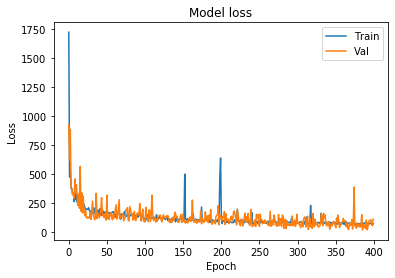

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [51]:
# serialize model to JSON
model_json = model.to_json()
with open("modelnum.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelnum.h5")
print("Saved model to disk")

Saved model to disk


In [52]:
from numpy import array
Xnew = array([[0.38259114, 0.2897271 , 0.61579353, 0.10559242, 0.36690397,
        0.99604307]])
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s"%(Xnew[0], ynew[0]))

X=[0.38259114 0.2897271  0.61579353 0.10559242 0.36690397 0.99604307], Predicted=[2714.4795]


In [53]:
from sklearn.metrics import r2_score

In [54]:
Xnew = array([[0.38259114, 0.2897271 , 0.61579353, 0.10559242, 0.36690397,
        0.99604307]])
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s"%(Xnew[0], ynew[0]))

X=[0.38259114 0.2897271  0.61579353 0.10559242 0.36690397 0.99604307], Predicted=[2714.4795]


In [55]:
print(Xnew)

[[0.38259114 0.2897271  0.61579353 0.10559242 0.36690397 0.99604307]]


In [56]:
Xnew = array([[X_scale[0][0], X_scale[0][1] , X_scale[0][2], X_scale[0][3], X_scale[0][4],
        X_scale[0][5]]])
print(Xnew)
print(len(X_scale))

[[0.         0.         0.16183086 0.         0.08063807 0.        ]]
80


In [57]:
import numpy as np
from numpy import array
arr = []
for x in range(len(X_scale)):
    Xnew = array([[X_scale[x][0], X_scale[x][1] , X_scale[x][2], X_scale[x][3], X_scale[x][4], X_scale[x][5]]])
    ynew = model.predict(Xnew)
    #print(ynew[0][0])
    arr.append(ynew[0][0])
array = np.array(arr)

In [58]:
array.tolist()

[2750.473388671875,
 2744.766357421875,
 2738.802001953125,
 2732.58935546875,
 2726.20166015625,
 2719.83642578125,
 2713.620361328125,
 2707.779296875,
 2702.741943359375,
 2699.40966796875,
 2699.7998046875,
 2708.962890625,
 2737.32568359375,
 2775.7763671875,
 2788.62548828125,
 2802.18212890625,
 2816.491455078125,
 2831.40966796875,
 2846.509521484375,
 2861.646728515625,
 2876.80322265625,
 2891.97412109375,
 2907.156982421875,
 2922.339599609375,
 2937.503662109375,
 2952.6357421875,
 2967.712890625,
 2982.69287109375,
 2983.89453125,
 2984.416748046875,
 2984.33447265625,
 2983.475830078125,
 2981.466796875,
 2977.99462890625,
 2973.0078125,
 2966.486328125,
 2958.333984375,
 2948.47607421875,
 2936.860107421875,
 2923.417236328125,
 2905.486328125,
 2880.252197265625,
 2847.58447265625,
 2809.83642578125,
 2769.255859375,
 2725.37841796875,
 2678.77880859375,
 2632.57861328125,
 2589.424560546875,
 2550.447021484375,
 2514.3623046875,
 2489.06689453125,
 2476.57861328125,
 2

In [59]:
r2_score(Y.tolist(), array.tolist())

0.6098097439441232

In [60]:
myText = open(r'C:\Users\alejo\Documents\Proyecto_Integrador_2\AI_Value\Combination\Interpolation\RPD\RPD_R2ScoreNumAlejo.txt','w')
myString = str(r2_score(Y.tolist(), array.tolist()))
myText.write(myString)
myText.close()